## Feature Selection with Filtering Method | Constant, Quasi Constant and Duplicate Feature Removal

Watch it here: 

Part1: https://youtu.be/nPHU1CpX4jg

Part2: https://youtu.be/m0fs0v5GGlg


Watch Full Playlist: https://www.youtube.com/playlist?list=PLc2rvfiptPSQYzmDIFuq2PqN2n28ZjxDH

Unnecessary and redundant features not only slow down the training time of an algorithm, but they also affect the performance of the algorithm.

There are several advantages of performing feature selection before training machine learning models:
- Models with less number of features have higher explainability
- It is easier to implement machine learning models with reduced features
- Fewer features lead to enhanced generalization which in turn reduces overfitting
- Feature selection removes data redundancy
- Training time of models with fewer features is significantly lower
- Models with fewer features are less prone to errors

### What is filter method? 

Features selected using filter methods can be used as an input to any machine learning models.

- Univariate -> Fisher Score, Mutual Information Gain, Variance etc
- Multi-variate -> Pearson Correlation

The univariate filter methods are the type of methods where individual features are ranked according to specific criteria. The top N features are then selected. Different types of ranking criteria are used for univariate filter methods, for example fisher score, mutual information, and variance of the feature.

Multivariate filter methods are capable of removing redundant features from the data since they take the mutual relationship between the features into account.

### Univariate Filtering Methods in this lesson

- Constant Removal
- Quasi Constant Removal
- Duplicate Feature Removal

### Download Data Files
https://github.com/laxmimerit/Data-Files-for-Feature-Selection

### Constant Feature Removal 

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import VarianceThreshold

In [39]:
data = pd.read_csv('santander.csv', nrows = 20000)
data.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [40]:
X = data.drop('TARGET', axis = 1)
y = data['TARGET']

X.shape, y.shape

((20000, 370), (20000,))

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

### Constant Features Removal 

In [42]:
constant_filter = VarianceThreshold(threshold=0)
constant_filter.fit(X_train)

VarianceThreshold(threshold=0)

In [43]:
constant_filter.get_support().sum()

291

In [44]:
constant_list = [not temp for temp in constant_filter.get_support()]
constant_list

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 Fa

In [45]:
X.columns[constant_list]

Index(['ind_var2_0', 'ind_var2', 'ind_var13_medio_0', 'ind_var13_medio',
       'ind_var18_0', 'ind_var18', 'ind_var27_0', 'ind_var28_0', 'ind_var28',
       'ind_var27', 'ind_var34_0', 'ind_var34', 'ind_var41', 'ind_var46_0',
       'ind_var46', 'num_var13_medio_0', 'num_var13_medio', 'num_var18_0',
       'num_var18', 'num_var27_0', 'num_var28_0', 'num_var28', 'num_var27',
       'num_var34_0', 'num_var34', 'num_var41', 'num_var46_0', 'num_var46',
       'saldo_var13_medio', 'saldo_var18', 'saldo_var28', 'saldo_var27',
       'saldo_var34', 'saldo_var41', 'saldo_var46',
       'delta_imp_amort_var18_1y3', 'delta_imp_amort_var34_1y3',
       'delta_imp_reemb_var33_1y3', 'delta_imp_trasp_var17_out_1y3',
       'delta_imp_trasp_var33_out_1y3', 'delta_num_reemb_var33_1y3',
       'delta_num_trasp_var17_out_1y3', 'delta_num_trasp_var33_out_1y3',
       'imp_amort_var18_hace3', 'imp_amort_var18_ult1',
       'imp_amort_var34_hace3', 'imp_amort_var34_ult1', 'imp_var7_emit_ult1',
       'imp

In [46]:
X_train_filter = constant_filter.transform(X_train)
X_test_filter = constant_filter.transform(X_test)

In [47]:
X_train_filter.shape, X_test_filter.shape, X_train.shape

((16000, 291), (4000, 291), (16000, 370))

### Quasi constant feature removal 

In [48]:
quasi_constant_filter = VarianceThreshold(threshold=0.01)

In [49]:
quasi_constant_filter.fit(X_train_filter)

VarianceThreshold(threshold=0.01)

In [50]:
quasi_constant_filter.get_support().sum()

245

In [51]:
291-245

46

In [52]:
X_train_quasi_filter = quasi_constant_filter.transform(X_train_filter)
X_test_quasi_filter = quasi_constant_filter.transform(X_test_filter)

In [53]:
X_train_quasi_filter.shape, X_test_quasi_filter.shape

((16000, 245), (4000, 245))

In [54]:
370-245

125

### Remove Duplicate Features 

In [55]:
X_train_T = X_train_quasi_filter.T
X_test_T = X_test_quasi_filter.T

In [56]:
type(X_train_T)

numpy.ndarray

In [57]:
X_train_T = pd.DataFrame(X_train_T)
X_test_T = pd.DataFrame(X_test_T)

In [58]:
X_train_T.shape, X_test_T.shape

((245, 16000), (245, 4000))

In [59]:
X_train_T.duplicated().sum()

18

In [60]:
duplicated_features = X_train_T.duplicated()
duplicated_features

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
215    False
216    False
217    False
218    False
219    False
220    False
221    False
222    False
223    False
224    False
225    False
226    False
227    False
228    False
229    False
230    False
231    False
232    False
233    False
234    False
235    False
236    False
237    False
238    False
239    False
240    False
241    False
242    False
243    False
244    False
Length: 245, dtype: bool

In [61]:
features_to_keep = [not index for index in duplicated_features]

In [62]:
X_train_unique = X_train_T[features_to_keep].T
X_test_unique = X_test_T[features_to_keep].T

In [63]:
X_train_unique.shape, X_train.shape

((16000, 227), (16000, 370))

In [64]:
370-227

143

### Build ML model and compare the performance of the selected feature 

In [65]:
def run_randomForest(X_train, X_test, y_train, y_test):
    clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('Accuracy on test set: ')
    print(accuracy_score(y_test, y_pred))

In [66]:
%%time
run_randomForest(X_train_unique, X_test_unique, y_train, y_test)

Accuracy on test set: 
0.95875
Wall time: 2.18 s


In [67]:
%%time
run_randomForest(X_train, X_test, y_train, y_test)

Accuracy on test set: 
0.9585
Wall time: 2.87 s


In [68]:
(1.51-1.26)*100/1.51

16.556291390728475

## Feature Selection with Filtering Method- Correlated Feature Removal

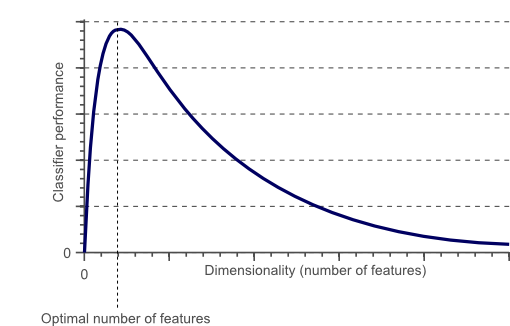

A dataset can also contain correlated features. Two or more than two features are correlated if they are close to each other in the linear space.

Correlation between the output observations and the input features is very important and such features should be retained

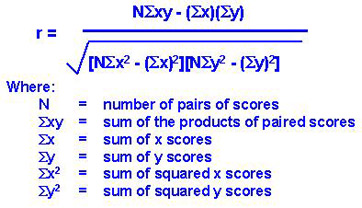

#### Summary 

- Feature Space to target correlation is desired
- Feature to feature correlation is not desired
- If 2 features are highly correlated then either feature is redundant
- Correlation in feature space increases model complexity
- Removing correlated features improves model performance
- Different model shows different performance over the correlated features

In [97]:
corrmat = X_train_unique.corr()

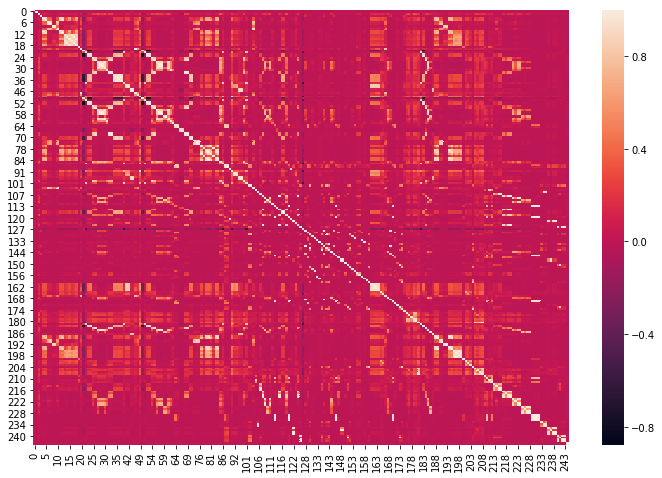

In [99]:
plt.figure(figsize=(12,8))
sns.heatmap(corrmat)

In [100]:
def get_correlation(data, threshold):
    corr_col = set()
    corrmat = data.corr()
    for i in range(len(corrmat.columns)):
        for j in range(i):
            if abs(corrmat.iloc[i, j])> threshold:
                colname = corrmat.columns[i]
                corr_col.add(colname)
    return corr_col

In [101]:
corr_features = get_correlation(X_train_unique, 0.85)
corr_features

{5,
 7,
 9,
 11,
 12,
 14,
 15,
 16,
 17,
 18,
 23,
 24,
 28,
 29,
 30,
 32,
 33,
 35,
 36,
 38,
 42,
 46,
 47,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 60,
 61,
 62,
 65,
 67,
 68,
 69,
 70,
 72,
 76,
 80,
 81,
 82,
 83,
 84,
 86,
 87,
 88,
 91,
 93,
 95,
 98,
 100,
 101,
 103,
 104,
 111,
 115,
 117,
 120,
 121,
 125,
 136,
 138,
 143,
 146,
 149,
 153,
 154,
 157,
 158,
 161,
 162,
 163,
 164,
 169,
 170,
 173,
 180,
 182,
 183,
 184,
 185,
 188,
 189,
 190,
 191,
 192,
 193,
 194,
 195,
 197,
 198,
 199,
 204,
 205,
 207,
 208,
 215,
 216,
 217,
 219,
 220,
 221,
 223,
 224,
 227,
 228,
 229,
 230,
 231,
 232,
 234,
 235,
 236,
 237,
 238,
 239,
 240,
 241,
 242,
 243}

In [102]:
len(corr_features)

124

In [103]:
X_train_uncorr = X_train_unique.drop(labels=corr_features, axis = 1)
X_test_uncorr = X_test_unique.drop(labels = corr_features, axis = 1)

In [104]:
X_train_uncorr.shape, X_test_uncorr.shape

((16000, 103), (4000, 103))

In [105]:
%%time
run_randomForest(X_train_uncorr, X_test_uncorr, y_train, y_test)

Accuracy on test set: 
0.95875
Wall time: 912 ms


In [106]:
%%time
run_randomForest(X_train, X_test, y_train, y_test)

Accuracy on test set: 
0.9585
Wall time: 1.53 s


In [107]:
(1.53-0.912)*100/1.53

40.3921568627451

### Feature Grouping and Feature Importance 

In [115]:
corrmat

,0,1,2,3,4,5,6,7,8,9,...,235,236,237,238,239,240,241,242,243,244
0,1.000000,-0.025277,-0.001942,0.003594,0.004054,-0.001697,-0.015882,-0.019807,0.000956,-0.000588,...,-0.001337,0.002051,-0.008500,0.006554,0.005907,0.008825,-0.009174,0.012031,0.012128,0.006612
1,-0.025277,1.000000,-0.007647,0.001819,0.008981,0.009232,0.001638,0.001746,0.000614,0.000695,...,0.000544,0.000586,0.000337,0.000550,0.000563,0.000922,0.000598,0.000875,0.000942,0.000415
2,-0.001942,-0.007647,1.000000,0.030919,0.106245,0.109140,0.048524,0.055708,0.004040,0.005796,...,0.025522,0.020168,0.011550,0.019325,0.019527,0.041321,0.016172,0.043577,0.044281,-0.000810
3,0.003594,0.001819,0.030919,1.000000,0.029418,0.024905,0.014513,0.013857,-0.000613,-0.000691,...,0.014032,-0.000583,-0.000337,-0.000548,-0.000561,0.000541,-0.000577,0.000231,0.000235,0.000966
4,0.004054,0.008981,0.106245,0.029418,1.000000,0.888789,0.381632,0.341266,0.012927,0.019674,...,0.002328,0.016743,-0.001662,0.020509,0.021276,-0.001905,-0.000635,-0.002552,-0.002736,0.003656
5,-0.001697,0.009232,0.109140,0.024905,0.888789,1.000000,0.363680,0.384820,0.017671,0.030060,...,0.000328,0.010860,-0.001706,0.012963,0.013553,0.000871,0.007096,-0.001672,-0.001844,0.002257
6,-0.015882,0.001638,0.048524,0.014513,0.381632,0.363680,1.000000,0.908158,0.030397,0.036359,...,-0.000485,0.006351,-0.000301,0.002590,0.003867,-0.000818,-0.000515,-0.000779,-0.000839,0.004448
7,-0.019807,0.001746,0.055708,0.013857,0.341266,0.384820,0.908158,1.000000,0.047667,0.056456,...,-0.000514,0.006336,-0.000318,0.002476,0.003707,-0.000866,-0.000545,-0.000825,-0.000888,0.002427
8,0.000956,0.000614,0.004040,-0.000613,0.012927,0.017671,0.030397,0.047667,1.000000,0.988256,...,-0.000184,-0.000197,-0.000114,-0.000185,-0.000189,-0.000309,-0.000195,-0.000295,-0.000317,-0.000739
9,-0.000588,0.000695,0.005796,-0.000691,0.019674,0.030060,0.036359,0.056456,0.988256,1.000000,...,-0.000207,-0.000222,-0.000128,-0.000208,-0.000213,-0.000349,-0.000220,-0.000332,-0.000358,-0.000811


In [116]:
corrdata = corrmat.abs().stack()
corrdata

0    0      1.000000
     1      0.025277
     2      0.001942
     3      0.003594
     4      0.004054
     5      0.001697
     6      0.015882
     7      0.019807
     8      0.000956
     9      0.000588
     10     0.012443
     11     0.010319
     12     0.005268
     13     0.017605
     14     0.016960
     15     0.018040
     16     0.017400
     17     0.016745
     18     0.015206
     19     0.000103
     20     0.001198
     21     0.006814
     22     0.002037
     23     0.010356
     24     0.012021
     25     0.001732
     26     0.001138
     27     0.004836
     28     0.006480
     29     0.005811
              ...   
244  215    0.000338
     216    0.000244
     217    0.017276
     218    0.006644
     219    0.018092
     220    0.017579
     221    0.014736
     222    0.002052
     223    0.014980
     224    0.014628
     225    0.014567
     226    0.005688
     227    0.015351
     228    0.014485
     229    0.013197
     230    0.012842
     231    0

In [117]:
corrdata = corrdata.sort_values(ascending=False)
corrdata

29   58     1.000000e+00
58   29     1.000000e+00
134  158    1.000000e+00
158  134    1.000000e+00
182  182    1.000000e+00
181  181    1.000000e+00
159  159    1.000000e+00
160  160    1.000000e+00
161  161    1.000000e+00
162  162    1.000000e+00
163  163    1.000000e+00
164  164    1.000000e+00
165  165    1.000000e+00
166  166    1.000000e+00
167  167    1.000000e+00
168  168    1.000000e+00
169  169    1.000000e+00
170  170    1.000000e+00
171  171    1.000000e+00
158  158    1.000000e+00
173  173    1.000000e+00
174  174    1.000000e+00
175  175    1.000000e+00
176  176    1.000000e+00
177  177    1.000000e+00
183  183    1.000000e+00
178  178    1.000000e+00
179  179    1.000000e+00
180  180    1.000000e+00
172  172    1.000000e+00
                ...     
113  60     8.925381e-06
60   113    8.925381e-06
82   193    8.892757e-06
193  82     8.892757e-06
230  110    8.848510e-06
110  230    8.848510e-06
235  15     8.707147e-06
15   235    8.707147e-06
186  243    7.715459e-06


In [118]:
corrdata = corrdata[corrdata>0.85]
corrdata = corrdata[corrdata<1]
corrdata

143  135    1.000000
135  143    1.000000
136  128    1.000000
128  136    1.000000
31   62     1.000000
62   31     1.000000
20   47     1.000000
47   20     1.000000
52   23     1.000000
23   52     1.000000
53   24     1.000000
24   53     1.000000
33   69     1.000000
69   33     1.000000
157  133    1.000000
133  157    1.000000
237  149    1.000000
149  237    1.000000
154  132    1.000000
132  154    1.000000
146  230    0.999997
230  146    0.999997
238  122    0.999945
122  238    0.999945
148  149    0.999929
149  148    0.999929
237  148    0.999929
148  237    0.999929
231  232    0.999892
232  231    0.999892
              ...   
183  52     0.860163
52   183    0.860163
183  23     0.860163
23   183    0.860163
79   195    0.859806
195  79     0.859806
8    193    0.859270
193  8      0.859270
29   61     0.858830
61   29     0.858830
     58     0.858830
58   61     0.858830
84   77     0.858529
77   84     0.858529
83   189    0.858484
189  83     0.858484
84   194    0

In [119]:
corrdata = pd.DataFrame(corrdata).reset_index()
corrdata.columns = ['features1', 'features2', 'corr_value']
corrdata

,features1,features2,corr_value
0,143,135,1.000000
1,135,143,1.000000
2,136,128,1.000000
3,128,136,1.000000
4,31,62,1.000000
5,62,31,1.000000
6,20,47,1.000000
7,47,20,1.000000
8,52,23,1.000000
9,23,52,1.000000


In [120]:
grouped_feature_list = []
correlated_groups_list = []
for feature in corrdata.features1.unique():
    if feature not in grouped_feature_list:
        correlated_block = corrdata[corrdata.features1 == feature]
        grouped_feature_list = grouped_feature_list + list(correlated_block.features2.unique()) + [feature]
        correlated_groups_list.append(correlated_block)

In [121]:
len(correlated_groups_list)

56

In [123]:
X_train.shape, X_train_uncorr.shape

((16000, 370), (16000, 103))

In [124]:
for group in correlated_groups_list:
    print(group)

   features1  features2  corr_value
0        143        135         1.0
     features1  features2  corr_value
2          136        128    1.000000
197        136        169    0.959468
   features1  features2  corr_value
4         31         62         1.0
   features1  features2  corr_value
6         20         47         1.0
     features1  features2  corr_value
8           52         23    1.000000
297         52         24    0.927683
299         52         53    0.927683
448         52         21    0.877297
505         52        183    0.860163
     features1  features2  corr_value
12          33         69    1.000000
224         33         32    0.947113
228         33         68    0.946571
322         33         26    0.917665
337         33         55    0.914178
422         33        184    0.884383
    features1  features2  corr_value
14        157        133         1.0
    features1  features2  corr_value
16        237        149    1.000000
26        237        148    

### Feature Importance based on tree based classifiers 

In [125]:
important_features = []
for group in correlated_groups_list:
    features = list(group.features1.unique()) + list(group.features2.unique())
    rf = RandomForestClassifier(n_estimators=100, random_state=0)
    rf.fit(X_train_unique[features], y_train)
    
    importance = pd.concat([pd.Series(features), pd.Series(rf.feature_importances_)], axis = 1)
    importance.columns = ['features', 'importance']
    importance.sort_values(by = 'importance', ascending = False, inplace = True)
    feat = importance.iloc[0]
    important_features.append(feat)
    

In [126]:
important_features

[features      135.00
 importance      0.51
 Name: 1, dtype: float64, features      128.000000
 importance      0.563757
 Name: 1, dtype: float64, features      62.00
 importance     0.51
 Name: 1, dtype: float64, features      47.00
 importance     0.51
 Name: 1, dtype: float64, features      183.000000
 importance      0.285817
 Name: 5, dtype: float64, features      184.00000
 importance      0.34728
 Name: 6, dtype: float64, features      157.00
 importance      0.34
 Name: 0, dtype: float64, features      148.000000
 importance      0.505844
 Name: 2, dtype: float64, features      132.00
 importance      0.39
 Name: 1, dtype: float64, features      120.000000
 importance      0.749683
 Name: 6, dtype: float64, features      122.00
 importance      0.34
 Name: 1, dtype: float64, features      82.000000
 importance     0.518827
 Name: 0, dtype: float64, features      125.000000
 importance      0.940524
 Name: 3, dtype: float64, features      197.000000
 importance      0.289727
 Na

In [127]:
important_features = pd.DataFrame(important_features)

In [128]:
important_features.reset_index(inplace=True, drop = True)

In [129]:
important_features

,features,importance
0,135.0,0.510000
1,128.0,0.563757
2,62.0,0.510000
3,47.0,0.510000
4,183.0,0.285817
5,184.0,0.347280
6,157.0,0.340000
7,148.0,0.505844
8,132.0,0.390000
9,120.0,0.749683


In [130]:
features_to_consider = set(important_features['features'])

In [131]:
features_to_discard = set(corr_features) - set(features_to_consider)

In [132]:
features_to_discard = list(features_to_discard)

In [133]:
X_train_grouped_uncorr = X_train_unique.drop(labels = features_to_discard, axis = 1)
X_train_grouped_uncorr.shape

(16000, 140)

In [134]:
X_test_grouped_uncorr = X_test_unique.drop(labels=features_to_discard, axis = 1)
X_test_grouped_uncorr.shape

(4000, 140)

In [136]:
%%time
run_randomForest(X_train_grouped_uncorr, X_test_grouped_uncorr, y_train, y_test)

Accuracy on test set: 
0.95775
Wall time: 1.01 s


In [137]:
%%time
run_randomForest(X_train, X_test, y_train, y_test)

Accuracy on test set: 
0.9585
Wall time: 1.48 s


In [138]:
%%time
run_randomForest(X_train_uncorr, X_test_uncorr, y_train, y_test)

Accuracy on test set: 
0.95875
Wall time: 891 ms
